In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

from numpy import nan
from numpy import isnan
from pandas import read_csv
from pandas import to_numeric

In [ ]:
dataset =pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/TEAM-19-FILE.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [ ]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506120 entries, 2006-12-16 17:24:00 to 2007-12-03 04:43:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    506120 non-null  object 
 1   Global_reactive_power  506120 non-null  object 
 2   Voltage                506120 non-null  object 
 3   Global_intensity       506120 non-null  object 
 4   Sub_metering_1         506120 non-null  object 
 5   Sub_metering_2         506119 non-null  object 
 6   Sub_metering_3         502185 non-null  float64
dtypes: float64(1), object(6)
memory usage: 30.9+ MB


In [ ]:
dataset.isnull().sum()

Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              1
Sub_metering_3           3935
dtype: int64

In [ ]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN


In [ ]:
dataset.replace('?', nan, inplace=True)

In [ ]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset= dataset.dropna(how = 'all')

In [ ]:
dataset = dataset.astype('float32')

In [ ]:
values= dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [ ]:
dataset.to_csv('TEAM-19-FILE.csv')

In [ ]:
dataset = read_csv('TEAM-19-FILE.csv',header=None)
print(dataset.head())

                     0                    1  ...               7               8
0             datetime  Global_active_power  ...  Sub_metering_3  sub_metering_4
1  2006-12-16 17:24:00                4.216  ...            17.0        52.26667
2  2006-12-16 17:25:00                 5.36  ...            16.0       72.333336
3  2006-12-16 17:26:00                5.374  ...            17.0       70.566666
4  2006-12-16 17:27:00                5.388  ...            17.0            71.8

[5 rows x 9 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


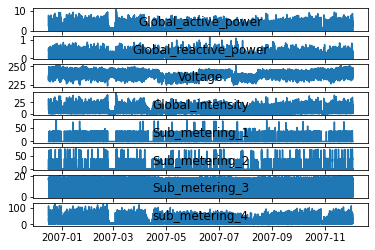

In [ ]:
#line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('TEAM-19-FILE.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# line plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	pyplot.plot(dataset[name])
	pyplot.title(name, y=0)
pyplot.show()

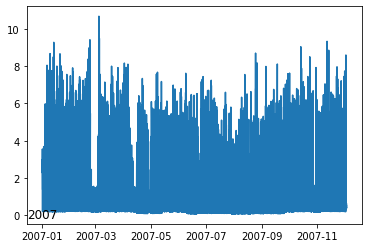

In [ ]:
# yearly line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('TEAM-19-FILE.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
years = ['2007']
pyplot.figure()
for i in range(len(years)):
	# prepare subplot
	ax = pyplot.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset[str(year)]
	# plot the active power for the year
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(str(year), y=0, loc='left')
pyplot.show()

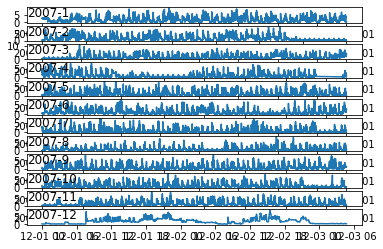

In [ ]:
# monthly line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('TEAM-19-FILE.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure()
for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2007-' + str(months[i])
	# get all observations for the month
	result = dataset[month]
	# plot the active power for the month
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(month, y=0, loc='left')
pyplot.show()

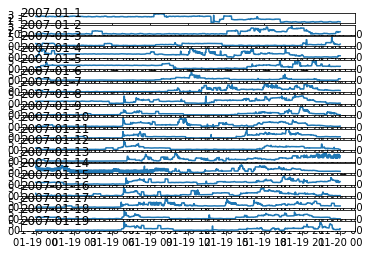

In [ ]:
# daily line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('TEAM-19-FILE.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
days = [x for x in range(1, 20)]
pyplot.figure()
for i in range(len(days)):
	# prepare subplot
	ax = pyplot.subplot(len(days), 1, i+1)
	# determine the day to plot
	day = '2007-01-' + str(days[i])
	# get all observations for the day
	result = dataset[day]
	# plot the active power for the day
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(day, y=0, loc='left')
pyplot.show()

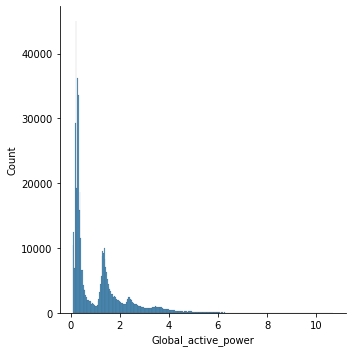

In [ ]:
import seaborn as sns
sns.displot(dataset['Global_active_power'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


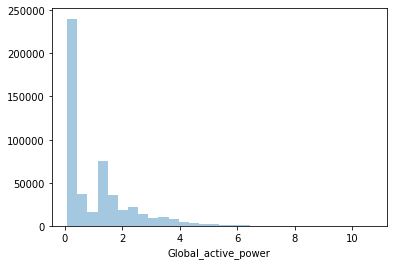

In [ ]:
sns.distplot(dataset['Global_active_power'],kde=False,bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


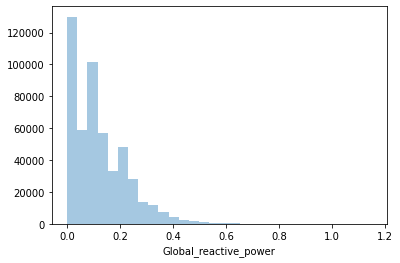

In [ ]:
sns.distplot(dataset['Global_reactive_power'],kde=False,bins=30)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


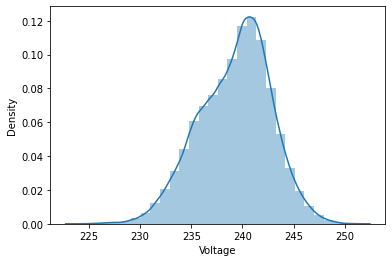

In [ ]:
sns.distplot(dataset['Voltage'],kde=True,bins=30)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


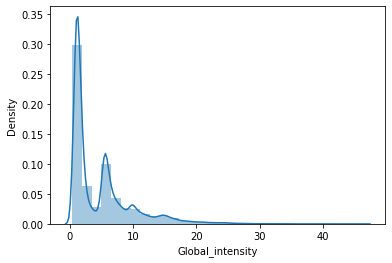

In [ ]:
sns.distplot(dataset['Global_intensity'],kde=True,bins=30)


In [ ]:
dataset.isnull().any()

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2            True
Sub_metering_3            True
sub_metering_4            True
dtype: bool

In [ ]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [ ]:
dataset.isnull().any()

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2            True
Sub_metering_3            True
sub_metering_4            True
dtype: bool

In [ ]:
dataset["Sub_metering_2"].fillna(dataset["Sub_metering_2"].mean(),inplace = True)
dataset["Sub_metering_3"].fillna(dataset["Sub_metering_3"].mean(),inplace = True)
dataset["sub_metering_4"].fillna(dataset["sub_metering_4"].mean(),inplace = True)

In [ ]:
dataset.isnull().any()

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
sub_metering_4           False
dtype: bool

In [ ]:
dataset


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.000000,17.000000,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.000000,16.000000,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.000000,17.000000,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.000000,17.000000,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.000000,17.000000,43.100000
...,...,...,...,...,...,...,...,...
2007-12-03 04:39:00,0.464,0.086,243.60,2.2,0.0,0.000000,0.000000,7.733333
2007-12-03 04:40:00,0.436,0.000,243.52,2.0,0.0,0.000000,0.000000,7.266667
2007-12-03 04:41:00,0.394,0.000,243.83,1.8,0.0,0.000000,0.000000,6.566667


In [ ]:
x=dataset.iloc[:,0:7].values
y=dataset.iloc[:,7].values

In [ ]:
x

array([[  4.216     ,   0.418     , 234.84      , ...,   0.        ,
          1.        ,  17.        ],
       [  5.36      ,   0.436     , 233.63      , ...,   0.        ,
          1.        ,  16.        ],
       [  5.374     ,   0.498     , 233.29      , ...,   0.        ,
          2.        ,  17.        ],
       ...,
       [  0.394     ,   0.        , 243.83      , ...,   0.        ,
          0.        ,   0.        ],
       [  0.394     ,   0.        , 243.6       , ...,   0.        ,
          0.        ,   0.        ],
       [  0.394     ,   0.        , 243.32      , ...,   0.        ,
          1.64774137,   5.67888527]])

In [ ]:
y

array([52.26667   , 72.333336  , 70.566666  , ...,  6.5666666 ,
        6.5666666 ,  9.98736216])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.2,random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypred = lr.predict(x_test)

In [ ]:
ypred

array([ 5.66666667,  5.56666667, 40.06666666, ...,  5.1       ,
        7.03333333,  5.06666667])

In [ ]:
y_test

array([ 5.6666665,  5.5666676, 40.066666 , ...,  5.1000004,  7.0333333,
        5.0666676])

In [ ]:
from sklearn.metrics import r2_score
accuracy = r2_score(ypred,y_test)

In [ ]:
accuracy

0.9999907583951816

In [ ]:
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.000000,17.000000,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.000000,16.000000,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.000000,17.000000,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.000000,17.000000,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.000000,17.000000,43.100000
...,...,...,...,...,...,...,...,...
2007-12-03 04:39:00,0.464,0.086,243.60,2.2,0.0,0.000000,0.000000,7.733333
2007-12-03 04:40:00,0.436,0.000,243.52,2.0,0.0,0.000000,0.000000,7.266667
2007-12-03 04:41:00,0.394,0.000,243.83,1.8,0.0,0.000000,0.000000,6.566667


In [ ]:
pre1=lr.predict([[4.0,0.41,240.0,15.1,0.0,1.0,17.0]])

In [ ]:
pre1

array([48.66666667])

In [ ]:
import pickle
pickle.dump(lr,open('lr.pkl','wb'))


In [ ]:
dataset.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
sub_metering_4           float64
dtype: object

In [ ]:
dataset.shape

(502186, 8)

In [ ]:
x= x.astype(np.float32)

In [ ]:
x

array([[  4.216    ,   0.418    , 234.84     , ...,   0.       ,
          1.       ,  17.       ],
       [  5.36     ,   0.436    , 233.63     , ...,   0.       ,
          1.       ,  16.       ],
       [  5.374    ,   0.498    , 233.29     , ...,   0.       ,
          2.       ,  17.       ],
       ...,
       [  0.394    ,   0.       , 243.83     , ...,   0.       ,
          0.       ,   0.       ],
       [  0.394    ,   0.       , 243.6      , ...,   0.       ,
          0.       ,   0.       ],
       [  0.394    ,   0.       , 243.32     , ...,   0.       ,
          1.6477413,   5.6788855]], dtype=float32)

In [ ]:
y= y.astype(np.float32)

In [ ]:
y

array([52.26667  , 72.333336 , 70.566666 , ...,  6.5666666,  6.5666666,
        9.987362 ], dtype=float32)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = dataset.corr()

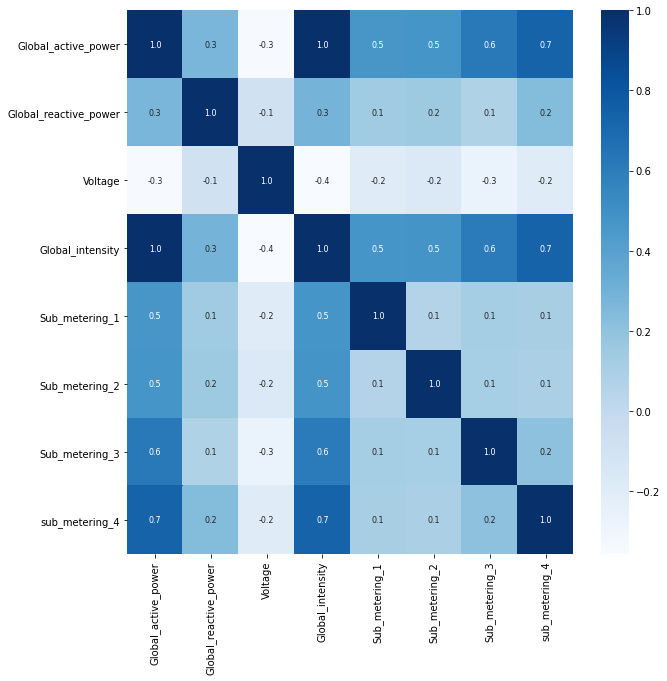

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


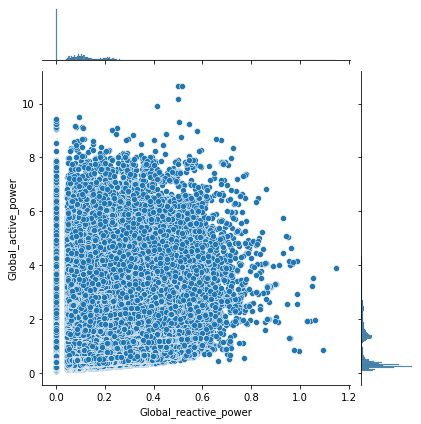

In [ ]:
sns.jointplot( x = 'Global_reactive_power' , y = 'Global_active_power' , data = dataset , kind = 'scatter')


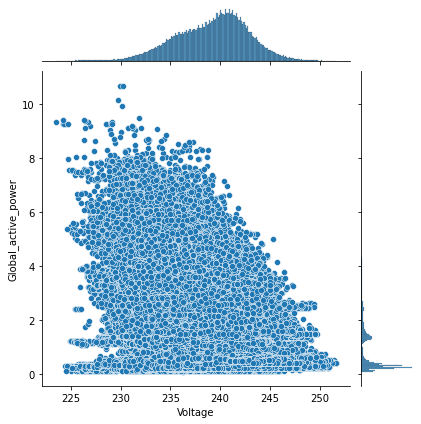

In [ ]:
sns.jointplot( x = 'Voltage' , y = 'Global_active_power' , data = dataset , kind = 'scatter')


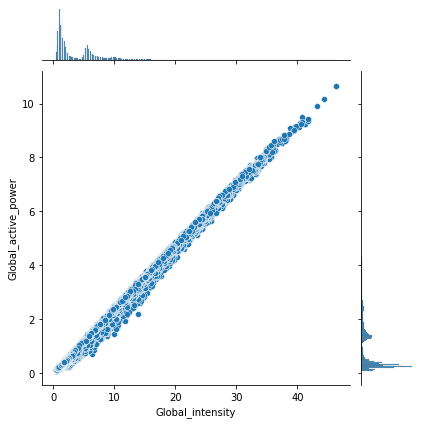

In [ ]:
sns.jointplot( x = 'Global_intensity' , y = 'Global_active_power' , data = dataset , kind = 'scatter')


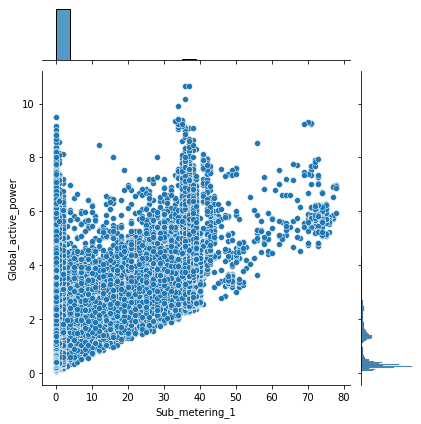

In [ ]:
sns.jointplot( x = 'Sub_metering_1' , y = 'Global_active_power' , data = dataset , kind = 'scatter')


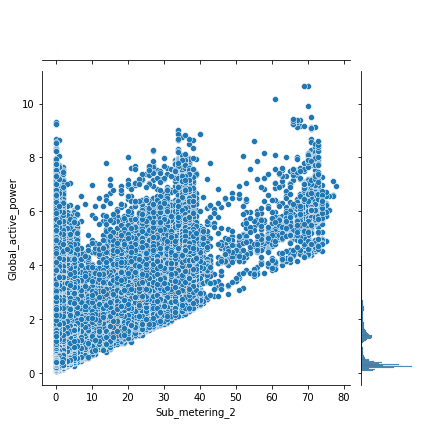

In [ ]:
sns.jointplot( x = 'Sub_metering_2' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

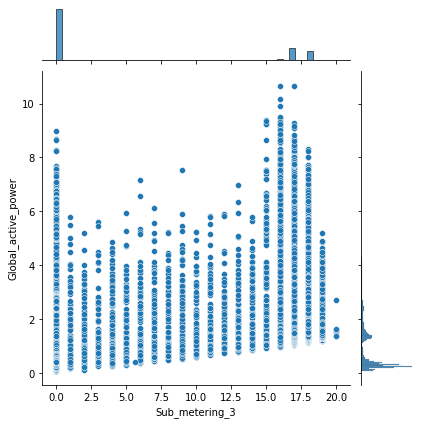

In [ ]:
sns.jointplot( x = 'Sub_metering_3' , y = 'Global_active_power' , data = dataset , kind = 'scatter')


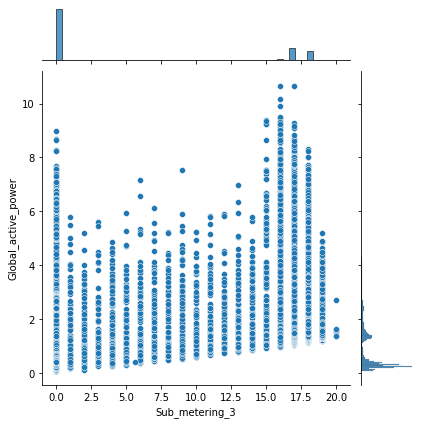

In [ ]:
sns.jointplot( x = 'Sub_metering_3' , y = 'Global_active_power' , data = dataset , kind = 'scatter')
